In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pennylane as qml


In [26]:
data=pd.read_csv("C:/Users/JOSHWIN ISAC/OneDrive/Documents/GitHub/Quantum-Computing-project/dataset/Tweets.csv")

In [27]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [28]:
data.shape

(14640, 15)

In [29]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [30]:
tweet_data=data[['text','airline_sentiment']]
print(tweet_data.shape)
tweet_data.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [31]:
print(tweet_data.columns)


Index(['text', 'airline_sentiment'], dtype='object')


In [32]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string

[nltk_data] Downloading package stopwords to C:\Users\JOSHWIN
[nltk_data]     ISAC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JOSHWIN
[nltk_data]     ISAC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
#Text to lower
def to_lower(text):
  return text.lower()

#remove punctuation
def remove_punc(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

#remove stopwords
def remove_stopwords(text):
  stop_words=set(stopwords.words('english'))
  words=text.split()
  filtered_words=[word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

#remove numbers
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

# Lemmatize text
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

#remove symbols
def remove_symbols(text):
  return re.sub(r'[^\w\s]', '', text)

In [34]:
def preprocess_text(text):
  text=to_lower(text)
  text=remove_punc(text)
  text=remove_stopwords(text)
  text=remove_numbers(text)
  text=lemmatize_text(text)
  text=remove_symbols(text)
  return text

#calling the funtion preprocess
tweet_data['text']=tweet_data['text'].apply(preprocess_text)
tweet_data.head(5)

C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_11608\3765590890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['text']=tweet_data['text'].apply(preprocess_text)


,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus youve added commercial expe...,positive
2,virginamerica didnt today must mean need take ...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


In [35]:
#show the comments after preprocessing in df
tweet_data['Cleaned_reviews']=tweet_data['text'].apply(preprocess_text)
tweet_data.head(5)

C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_11608\2950051813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['Cleaned_reviews']=tweet_data['text'].apply(preprocess_text)


,text,airline_sentiment,Cleaned_reviews
0,virginamerica dhepburn said,neutral,virginamerica dhepburn said
1,virginamerica plus youve added commercial expe...,positive,virginamerica plus youve added commercial expe...
2,virginamerica didnt today must mean need take ...,neutral,virginamerica didnt today must mean need take ...
3,virginamerica really aggressive blast obnoxiou...,negative,virginamerica really aggressive blast obnoxiou...
4,virginamerica really big bad thing,negative,virginamerica really big bad thing


In [37]:
# Map 'airline_sentiment' to binary values: positive (1) and negative (0)
# You can extend this to neutral if needed
tweet_data['sentiment_label'] = tweet_data['airline_sentiment'].map({
    'positive': 1,
    'negative': 0
})

C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_11608\661066061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_data['sentiment_label'] = tweet_data['airline_sentiment'].map({


In [38]:
tweet_data.head(5)

,text,airline_sentiment,Cleaned_reviews,sentiment_label
0,virginamerica dhepburn said,neutral,virginamerica dhepburn said,NaN
1,virginamerica plus youve added commercial expe...,positive,virginamerica plus youve added commercial expe...,1.0
2,virginamerica didnt today must mean need take ...,neutral,virginamerica didnt today must mean need take ...,NaN
3,virginamerica really aggressive blast obnoxiou...,negative,virginamerica really aggressive blast obnoxiou...,0.0
4,virginamerica really big bad thing,negative,virginamerica really big bad thing,0.0


In [39]:
tweet_data_samples=tweet_data.sample(500)

In [42]:
tweet_data_samples.head()

,text,airline_sentiment,Cleaned_reviews,sentiment_label
13969,americanair dropping ball catering plane switc...,negative,americanair dropping ball catering plane switc...,0.0
12261,americanair understand,neutral,americanair understand,NaN
12165,americanair kax premium hoping flight better f...,positive,americanair kax premium hoping flight better f...,1.0
8201,jetblue flight jfk buf,neutral,jetblue flight jfk buf,NaN
13516,americanair stranded miami automated system ke...,negative,americanair stranded miami automated system ke...,0.0


In [43]:
tweet_data_samples.shape

(500, 4)

In [46]:
# Filter out neutral sentiments (NaN values in 'sentiment_label')
tweet_data_samples = tweet_data_samples.dropna(subset=['sentiment_label'])
# Convert 'sentiment_label' to integers for training
tweet_data_samples['sentiment_label'] = tweet_data_samples['sentiment_label'].astype(int)
# Check the resulting dataset
print(tweet_data_samples['sentiment_label'].value_counts())
print(tweet_data_samples.shape)

sentiment_label
0    316
1     72
Name: count, dtype: int64
(388, 4)


In [48]:
tweet_data_samples.head(5)

,text,airline_sentiment,Cleaned_reviews,sentiment_label
13969,americanair dropping ball catering plane switc...,negative,americanair dropping ball catering plane switc...,0
12165,americanair kax premium hoping flight better f...,positive,americanair kax premium hoping flight better f...,1
13516,americanair stranded miami automated system ke...,negative,americanair stranded miami automated system ke...,0
694,united flight delayedno one remembered turn he...,negative,united flight delayedno one remembered turn he...,0
8967,usairways one agent available speak,negative,usairways one agent available speak,0


In [50]:
vectorizer=TfidfVectorizer(max_features=4)
features = vectorizer.fit_transform(tweet_data_samples['Cleaned_reviews']).toarray()


# Normalize features for quantum compatibility
features = np.array([f / np.linalg.norm(f) if np.linalg.norm(f) > 0 else f for f in features])
print(features)

# Get the labels
labels = tweet_data_samples['sentiment_label'].values

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


In [51]:
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [60]:
import torch
import qiskit_code_assistant_jupyterlab
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap,RealAmplitudes
from qiskit_aer import AerSimulator

In [61]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [62]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [70]:
# Transfer features to GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)





# Convert PyTorch tensors to NumPy arrays
X_train_np = X_train_tensor.cpu().numpy() if X_train_tensor.is_cuda else X_train_tensor.numpy()
y_train_np = y_train_tensor.cpu().numpy() if y_train_tensor.is_cuda else y_train_tensor.numpy()
X_test_np = X_test_tensor.cpu().numpy() if X_test_tensor.is_cuda else X_test_tensor.numpy()
y_test_np = y_test_tensor.cpu().numpy() if y_test_tensor.is_cuda else y_test_tensor.numpy()


In [71]:
# Define the quantum feature map using a predefined library circuit
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)


In [72]:
from sklearn.metrics import accuracy_score

# Initialize the quantum circuit simulator
sampler = Sampler()

# Create Fidelity Quantum Kernel
quantum_kernel = FidelityQuantumKernel(
    fidelity=ComputeUncompute(sampler=sampler),
    feature_map=feature_map
)

# Define QSVC model
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Train QSVC
qsvc.fit(X_train_np, y_train_np)

# Test QSVC
y_pred = qsvc.predict(X_test_np)
accuracy = accuracy_score(y_test_np, y_pred)
print(f"QSVC Accuracy: {accuracy * 100:.2f}%")


C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_11608\2803496013.py:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_11608\2803496013.py:8: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity=ComputeUncompute(sampler=sampler),


QSVC Accuracy: 76.92%


Feature Map Circuit:


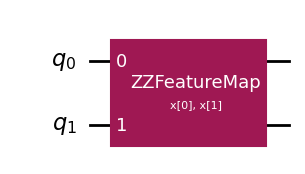

In [82]:
# Plot the feature map circuit
print("Feature Map Circuit:")
feature_map.draw(output='mpl')  # For a matplotlib plot (requires matplotlib)
